In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob


In [7]:
# read in DBSCAN result files for different cycles
file_path = '/Users/feizhao/Coding/QC/data/qc_test_*cycles_DBSCANRes.csv'
files = glob.glob(file_path)

# Sort the files by cycle number in the file name
sorted_files = sorted(files, key=lambda x: int(x.split("qc_test_")[1].split("cycles")[0]))

dbscan_data_ls = []
# Define the cycle numbers
cycle_num = [5, 10, 20, 30, 40]

for i, file in enumerate(sorted_files):
    cycle_cluster_df = pd.read_csv(file)
    cycle_cluster_df['cycle'] = cycle_num[i]
    dbscan_data_ls.append(cycle_cluster_df)

dbscan_data_df = pd.concat(dbscan_data_ls, axis=0, ignore_index=True)
dbscan_data_df = dbscan_data_df.sort_values(by=['id', 'cycle'])
print(dbscan_data_df)


    id   visible   probe    colorR    colorG    colorB   volumeAlpha  \
0    1         1       0  0.192157  0.945098  0.482353      0.056630   
5    1         1       0  0.419608  0.258824  0.811765      0.073390   
10   1         1       0  0.698039  0.313725  0.113725      0.094497   
15   1         1       0  0.709804  0.164706  0.745098      0.103919   
20   1         1       0  0.568627  0.443137  0.305882      0.108960   
1    2         1       0  0.807843  0.600000  0.662745      0.051824   
6    2         1       0  0.698039  0.792157  0.584314      0.058513   
11   2         1       0  0.180392  0.909804  0.011765      0.069893   
16   2         1       0  0.223529  0.180392  0.098039      0.075850   
21   2         1       0  0.976471  0.368627  0.670588      0.077776   
2    3         1       0  0.403922  0.564706  0.066667      0.046113   
7    3         1       0  0.811765  0.568627  0.262745      0.050235   
12   3         1       0  0.709804  0.113725  0.113725      0.05

In [8]:
volume = [[] for _ in range((dbscan_data_df['id'].max()+1))]
for i in range(1, (dbscan_data_df['id'].max()+1)):
    #print(i)
    cluster_df = dbscan_data_df.loc[dbscan_data_df['id']==i]
    for j in cycle_num:
        #print(j)
        volume[i].append(dbscan_data_df.loc[(dbscan_data_df['id']== i)&(dbscan_data_df['cycle']== j)][' volumeAlpha'])
       
volume_df = pd.DataFrame(volume)
print(volume_df)
volume_df.to_csv('/Users/feizhao/Coding/QC/data/volume_cycles.csv', index = False)


5
10
20
30
40
5
10
20
30
40
5
10
20
30
40
5
10
20
30
40
5
10
20
30
40
                                                  0  \
0                                              None   
1   0    0.05663
Name:  volumeAlpha, dtype: float64   
2  1    0.051824
Name:  volumeAlpha, dtype: float64   
3  2    0.046113
Name:  volumeAlpha, dtype: float64   
4  3    0.038039
Name:  volumeAlpha, dtype: float64   
5  4    0.021597
Name:  volumeAlpha, dtype: float64   

                                                  1  \
0                                              None   
1   5    0.07339
Name:  volumeAlpha, dtype: float64   
2  6    0.058513
Name:  volumeAlpha, dtype: float64   
3  7    0.050235
Name:  volumeAlpha, dtype: float64   
4   8    0.04851
Name:  volumeAlpha, dtype: float64   
5  9    0.031255
Name:  volumeAlpha, dtype: float64   

                                                   2  \
0                                               None   
1  10    0.094497
Name:  volumeAlpha, dtype: f

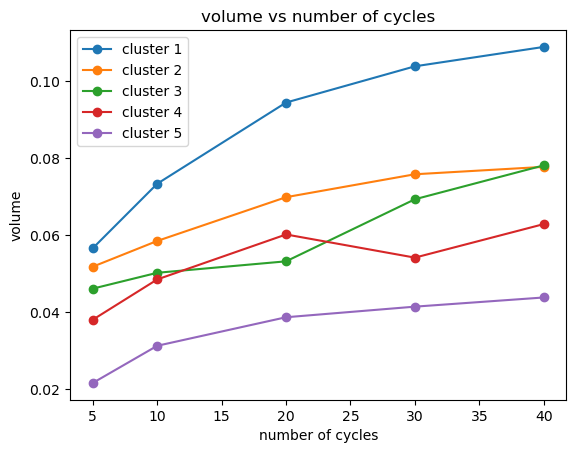

In [9]:
# Plot all clusters on the same graph

for i in range(1, 6):
    plt.plot(cycle_num, volume_df.loc[i, :], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('number of cycles')
plt.ylabel('volume')
plt.title('volume vs number of cycles')

# Add a legend
plt.legend(['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5'])

# Show the plot
plt.show()